<a href="https://colab.research.google.com/github/OsamaBarakat1/Google-Colab-Python/blob/main/AI_HUB_Python_Lecture_5%266.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Data & Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/traffic.csv')
df

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal
...,...,...,...,...,...,...,...,...,...
2971,10:45:00 PM,9,Thursday,16,3,1,36,56,normal
2972,11:00:00 PM,9,Thursday,11,0,1,30,42,normal
2973,11:15:00 PM,9,Thursday,15,4,1,25,45,normal
2974,11:30:00 PM,9,Thursday,16,5,0,27,48,normal


# **Data Cleaning & Preprocessing**


## Data Cleaning

In [ ]:
# Shows summary of the DataFrame (columns, data types, non-null counts, memory usage).
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB


In [ ]:
# Shows the number of missing values in each column.
df.isnull().sum()

,0
Time,0
Date,0
Day of the week,0
CarCount,0
BikeCount,0
BusCount,0
TruckCount,0
Total,0
Traffic Situation,0


In [ ]:
 # Counts total missing (NaN) values in the entire DataFrame.
df.isnull().sum().sum()

np.int64(0)

In [ ]:
# Counts the number of duplicate rows in the DataFrame.
df.duplicated().sum()

np.int64(0)

## Feature Encoding

In [ ]:
# Counts how many times each category appears in the 'Traffic Situation' column by (value_counts).
df['Traffic Situation'].value_counts()

,count
Traffic Situation,
0,1669
1,682
2,321
3,304


In [ ]:
# Creates a dictionary to manually map text labels into numbers.
mapping = {'normal': 0,'heavy': 1,'high': 2,'low':3}
# Replaces text categories with the numeric values defined in 'mapping'.
df['Traffic Situation'] = df['Traffic Situation'].replace(mapping)


In [ ]:
# Loads the LabelEncoder from scikit-learn for automatic label encoding.
from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()

# Converts 'Traffic Situation' into numeric labels (0,1,2,...) automatically.
df['Traffic Situation']=LabelEncoder.fit_transform(df['Traffic Situation'])
print(df['Traffic Situation'].unique())

[3 0 1 2]


In [ ]:
# Counts how many times each category appears in the 'Day of the week' column by (value_counts).
df['Day of the week'].value_counts()

,count
Day of the week,
2,480
3,480
4,480
5,384
6,384
0,384
1,384


In [ ]:
# Creates a dictionary to manually map text labels into numbers.
mapping = {'Sunday': 0,'Monday': 1,'Tuesday': 2,'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6}
# Replaces text categories with the numeric values defined in 'mapping'.
df['Day of the week'] = df['Day of the week'].replace(mapping)
print(df['Day of the week'].unique())

[2 3 4 5 6 0 1]


In [ ]:
# Converts 'Day of the week' into numeric labels (0,1,2,...) automatically.
df['Day of the week']=LabelEncoder.fit_transform(df['Day of the week'])
print(df['Day of the week'].unique())

[2 3 4 5 6 0 1]


In [ ]:
df['Time'] = pd.to_datetime(df['Time'])         # Converts the 'Time' column from string/object type into proper datetime format.
df['Hour'] = df['Time'].dt.hour                 # Extracts the hour (0–23) from the datetime and saves it in a new column called 'Hour'.
df.drop(axis=1,columns='Time',inplace=True)     # Removes the original 'Time' column from the DataFrame, keeping only the new 'Hour' column.

/tmp/ipython-input-497674113.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])         # Converts the 'Time' column from string/object type into proper datetime format.


In [ ]:
# Generates descriptive statistics for numerical columns in the DataFrame.
df.describe()

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Hour
count,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.00000
mean,16.000000,3.000000,68.696573,14.917339,15.279570,15.324933,114.218414,0.751344,11.50000
std,8.945775,1.917982,45.850693,12.847518,14.341986,10.603833,60.190627,1.007867,6.92335
min,1.000000,0.000000,6.000000,0.000000,0.000000,0.000000,21.000000,0.000000,0.00000
25%,8.000000,1.000000,19.000000,5.000000,1.000000,6.000000,55.000000,0.000000,5.75000
50%,16.000000,3.000000,64.000000,12.000000,12.000000,14.000000,109.000000,0.000000,11.50000
75%,24.000000,5.000000,107.000000,22.000000,25.000000,23.000000,164.000000,1.000000,17.25000
max,31.000000,6.000000,180.000000,70.000000,50.000000,40.000000,279.000000,3.000000,23.00000


#**DataVisualization**

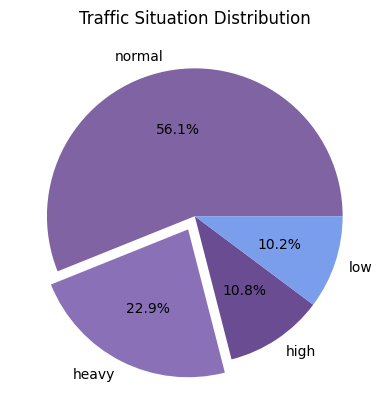

In [ ]:
plt.pie(
    df['Traffic Situation'].value_counts(),                 # Values: counts of each category in 'Traffic Situation'.
    labels=df['Traffic Situation'].value_counts().index,    # Labels: category names for each slice.
    autopct='%1.1f%%',                                      # Shows percentage on each slice with 1 decimal value.
    colors=['#7f63a2', '#8a71b7', '#6a4c93', '#7a9eeb'],    # Custom colors for the slices.
    explode=(0, 0.1, 0, 0)                                  # "Explodes" (separates) the 2nd slice for emphasis.
)

plt.title("Traffic Situation Distribution")  # Adds a title to the chart.
plt.show()                                   # Displays the pie chart.


**Pie Chart** – Traffic Situation Distribution

Benefit 1: Shows the percentage of each traffic condition (normal, low, high, heavy) in the data, so you can see which condition is most prevalent.

Benefit 2: Helps quickly and visually understand the distribution of traffic conditions, especially if you want to compare the size of each category relative to the others.

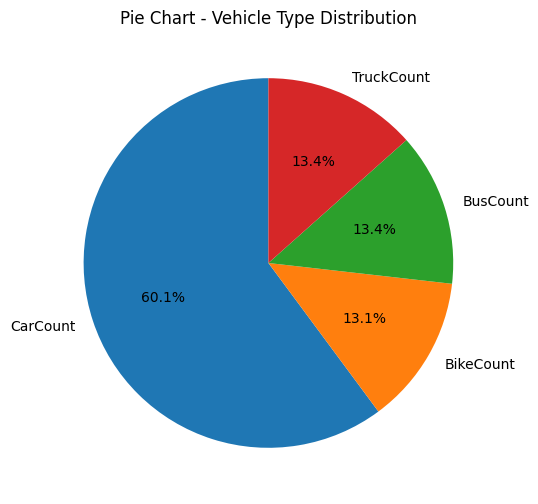

In [ ]:
group = df[['CarCount','BikeCount','BusCount','TruckCount']].sum()
# Sums the counts of each vehicle type across all rows → total numbers of cars, bikes, buses, and trucks.

plt.figure(figsize=(6,6))
# Sets the figure size.

plt.pie(
    group,                          # Values: total counts for each vehicle type.
    labels=group.index,             # Labels: the names of vehicle types.
    autopct='%1.1f%%',              # Shows percentages with 1 decimal place on each slice.
    startangle=90                   # Rotates the pie chart so it starts at the top (90°), you can change this angle such as (90,180,30,.....)
)

plt.title('Pie Chart - Vehicle Type Distribution')  # Adds a title to the chart.
plt.show()                                         # Displays the pie chart.


**Pie Chart** – Vehicle Type Distribution

Benefit 1: Shows the percentage of each vehicle type (car, bike, bus, truck) out of the total vehicles in the data.

Benefit 2: Gives an idea of ​​which vehicle type contributes most to traffic, useful for traffic planning or statistical analysis.

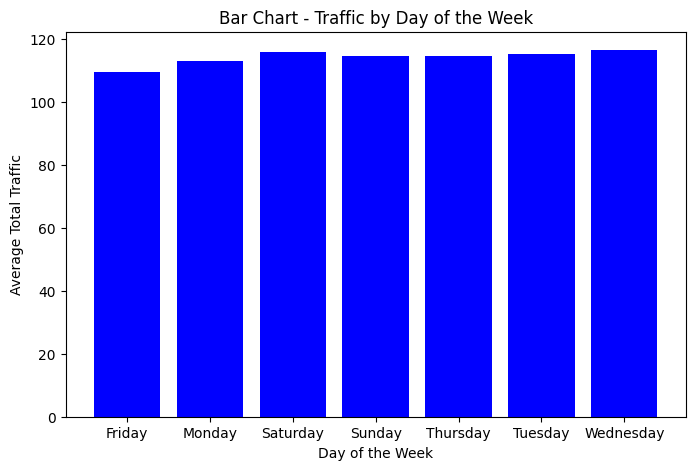

In [ ]:
# Group the data by 'Day of the week' and calculate the mean of 'Total' traffic for each group.
avg_by_day = df.groupby('Day of the week')['Total'].mean()

plt.figure(figsize=(8,5))

# Plot a bar chart
#   x-axis: the index of avg_by_day.
#   y-axis: the values of avg_by_day.
plt.bar(avg_by_day.index, avg_by_day.values, color='blue')

# Add a label for the x-axis
plt.xlabel('Day of the Week')

# Add a label for the y-axis
plt.ylabel('Average Total Traffic')

# Add a title at the top of the chart
plt.title('Bar Chart - Traffic by Day of the Week')

plt.show()


 **Bar Chart** – Traffic by Day of the Week

Benefit 1: Shows the average traffic volume for each day of the week, so you can compare days and see which day has the most traffic.

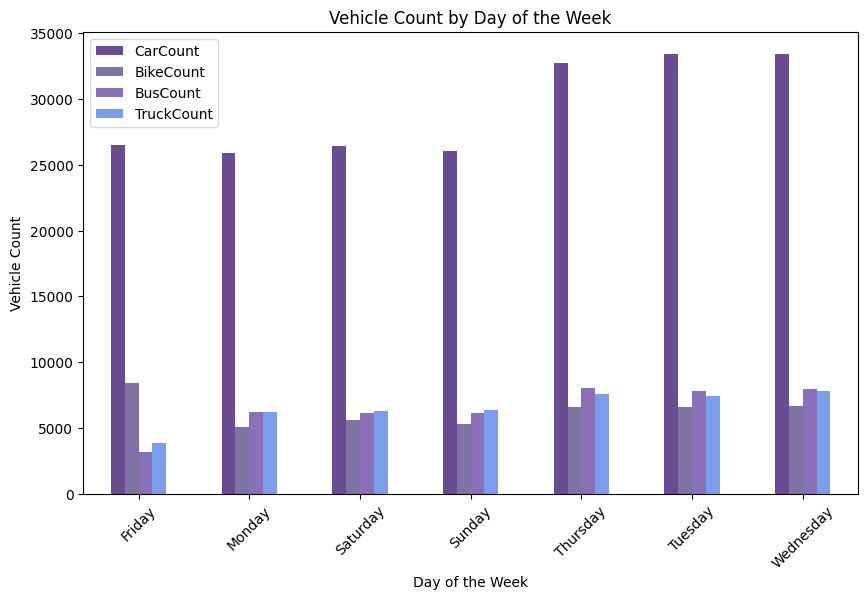

In [ ]:
# Calculate the total (sum) of each vehicle type grouped by 'Day of the week'
daily_vehicle_counts = df.groupby('Day of the week')[['CarCount', 'BikeCount', 'BusCount', 'TruckCount']].sum()

# Plot the grouped data as a bar chart
#   - kind='bar': creates a vertical bar chart
#   - color=[...]: assigns custom colors to each vehicle type (Car, Bike, Bus, Truck)
daily_vehicle_counts.plot(kind='bar', figsize=(10, 6), color=['#6a4c93', '#7f73a1', '#8a71b7', '#7a9eeb'])
plt.title('Vehicle Count by Day of the Week')
plt.ylabel('Vehicle Count')
plt.xlabel('Day of the Week')
plt.xticks(rotation=45)
plt.show()



**Bar Chart** -Vehicle Count by Day of the Week


Benefit 1: Shows a comparison of the number of each type of vehicle (cars, bikes, buses, trucks) across the days of the week.

Benefit 2: It's easy to quickly identify the days with the highest or lowest traffic for each type of vehicle.

Benefit 3: Car traffic is clearly higher than other vehicles on all days of the week.

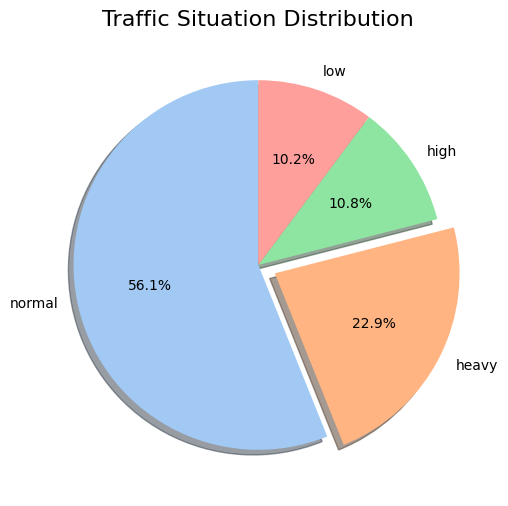

In [ ]:
# Pie chart showing the distribution of 'Traffic Situation' with pastel colors from seaborn library, exploded slice, shadow, and percentages.

colors = sns.color_palette("pastel")
plt.figure(figsize=(8,6))
plt.pie( df['Traffic Situation'].value_counts(), labels=df['Traffic Situation'].value_counts().index, autopct='%1.1f%%', colors=colors, explode=(0,0.1,0,0), shadow=True, startangle=90)
plt.title("Traffic Situation Distribution", fontsize=16)
plt.show()


**Pie Chart**-Traffic Situation Distribution


Benefit 1: Helps understand the distribution of common traffic situations on the roads.


Benefit 2: The vast majority of traffic is in normal traffic.

/tmp/ipython-input-2286466097.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipython-input-2286466097.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


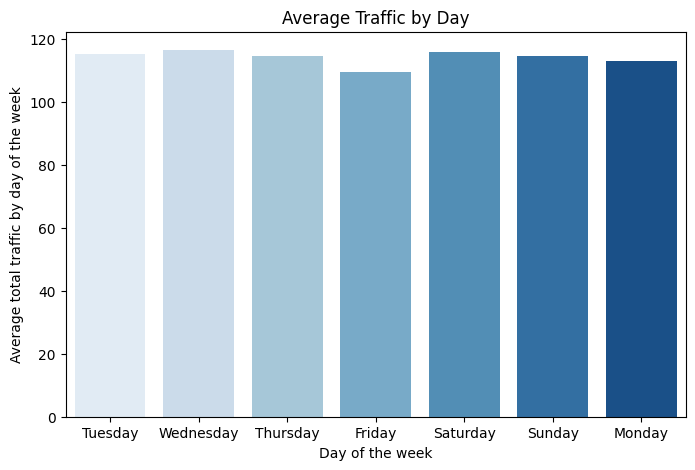

In [ ]:
# Bar plot using Seaborn to show average total traffic per day of the week with a blue color palette.
plt.figure(figsize=(8,5))
sns.barplot(
    data=df,
    x='Day of the week',    # Set x-axis to the 'Day of the week' column (categories)
    y='Total',              # Set y-axis to the 'Total' column (numeric values to plot)
    ci=None,                # Disable confidence intervals (no error bars)
    palette='Blues'         # Use a blue color palette for the bars
)
plt.xlabel('Day of the week')
plt.ylabel('Average total traffic by day of the week')
plt.title('Average Traffic by Day')
plt.show()


**Bar Chart**-Average Traffic by Day

Benefit 1: Gives the average number of vehicles per day, making it easier to compare days to each other in terms of traffic volume.

Benefit 2: It shows which days experience the highest traffic volume, for traffic management or maintenance planning.

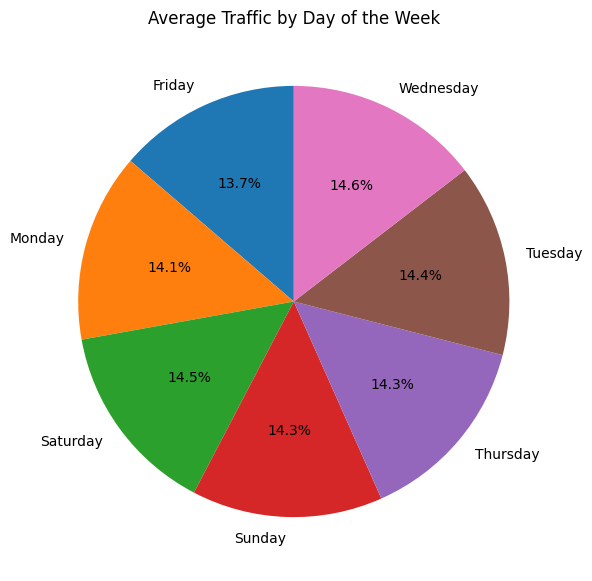

In [ ]:
# Groups the data by 'Day of the week' and calculates the average 'Total' traffic for each day.
avg_by_day = df.groupby('Day of the week')['Total'].mean()

plt.figure(figsize=(7,7))

plt.pie(
    avg_by_day.values,
    # Values: the average traffic for each day.

    labels=avg_by_day.index,
    # Labels: the days of the week corresponding to each slice.

    autopct='%1.1f%%',
    # Shows percentages on each slice with 1 decimal place.

    startangle=90,
    # Rotates the chart so the first slice starts at the top.

)

plt.title("Average Traffic by Day of the Week")
plt.show()


**Pie Chart** -Average Traffic by Day of the Week



Benefit 1: Represents the distribution of average traffic volume for each day as a percentage, making it easier to identify the busiest day.

Benefit 2: Wednesday and Saturday experience the highest percentages of traffic.

Benefit 3: Friday and Monday are the least congested days of the week.

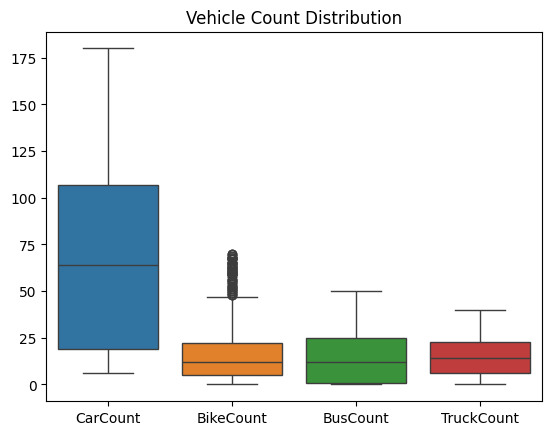

In [ ]:
vehicle_columns = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount']
# List of columns representing counts of different vehicle types.

sns.boxplot(data=df[vehicle_columns])
# Creates a box plot for each vehicle type to visualize the distribution, median, and outliers.

plt.title("Vehicle Count Distribution")
plt.show()


**Box Plot**

Benefit 1: Distribution and Median for Each Vehicle Type

Benefit 2: The line inside the box represents the median for each column.

Benefit 3: The box itself represents the lower quartile (Q1) and the upper quartile (Q3), meaning that 50% of the data falls within the box.

Benefit 4: Detecting Outliers

Benefit 5: Helps understand which vehicle type is more or less prevalent, and where most of the values ​​typically fall.

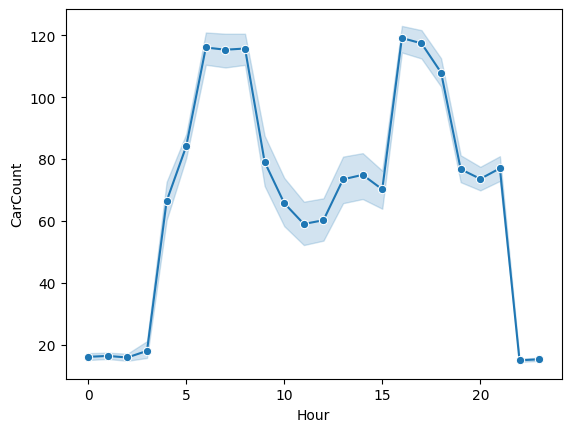

In [ ]:
sns.lineplot(
    data=df,
    x='Hour',       # X-axis: the hour of the day (0-23)
    y='CarCount',   # Y-axis: number of cars
    marker='o'      # Add a marker (circle) at each data point for clarity, you can use other symbol.
)
plt.show()

**Line Plot**

Benefit 1: Displaying trends over time

Benefit 2: Shows how the number of cars changes throughout the day (e.g., morning and evening rush hours).

Benefit 3: The line clearly and quickly shows the ups and downs.

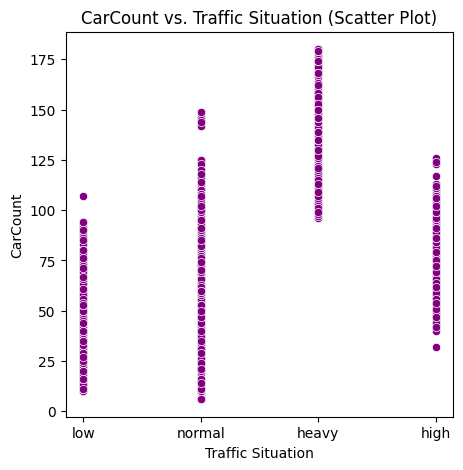

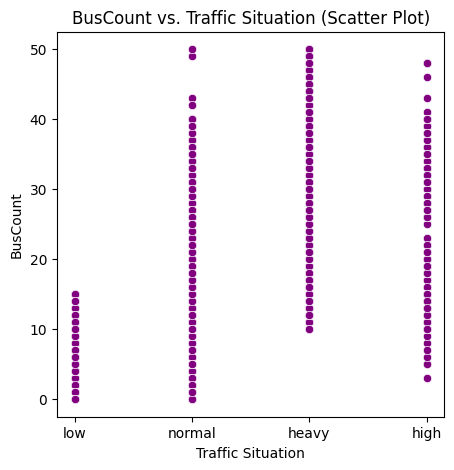

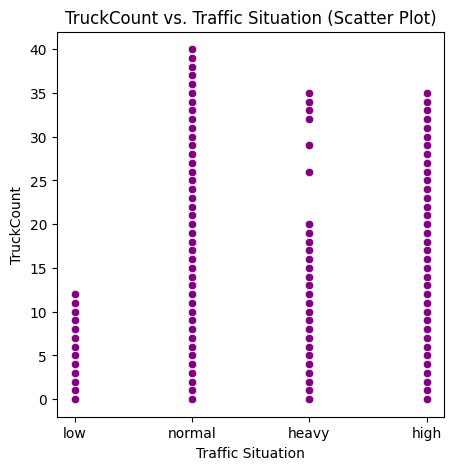

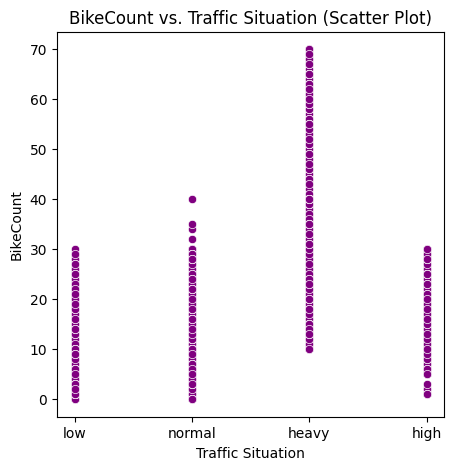

In [ ]:
columns = ['CarCount', 'BusCount', 'TruckCount', 'BikeCount']
# List of vehicle count columns to visualize against traffic situation

for col in columns:
    plt.figure(figsize=(5, 5))
    # Create a new figure for each scatter plot, size 5x5 inches

    sns.scatterplot(
        x='Traffic Situation',  # X-axis: categorical traffic situations
        y=col,                  # Y-axis: vehicle count for the current column
        data=df,                # DataFrame containing the data
        color='purple'          # Color of the scatter points
    )

    plt.xlabel("Traffic Situation")
    plt.ylabel(col)
    plt.title(f"{col} vs. Traffic Situation (Scatter Plot)")
    plt.show()


**Scatter Plots**-(CarCount vs. Traffic Situation, BusCount vs. Traffic Situation, TruckCount vs. Traffic Situation)

Benefit 1: Comparison of patterns between different vehicle types (cars, buses, trucks) for each congestion level.

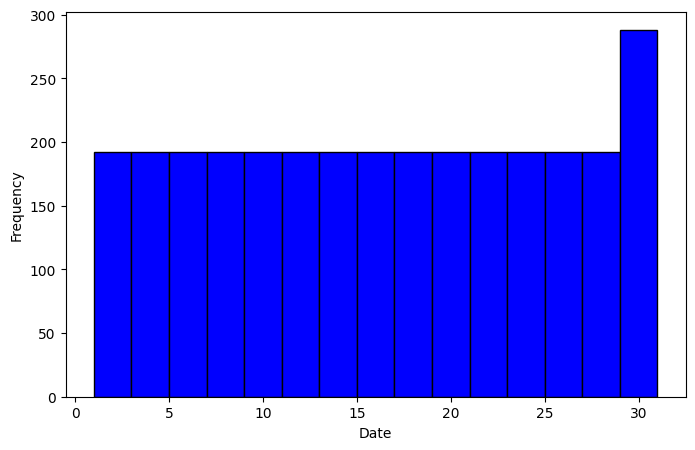

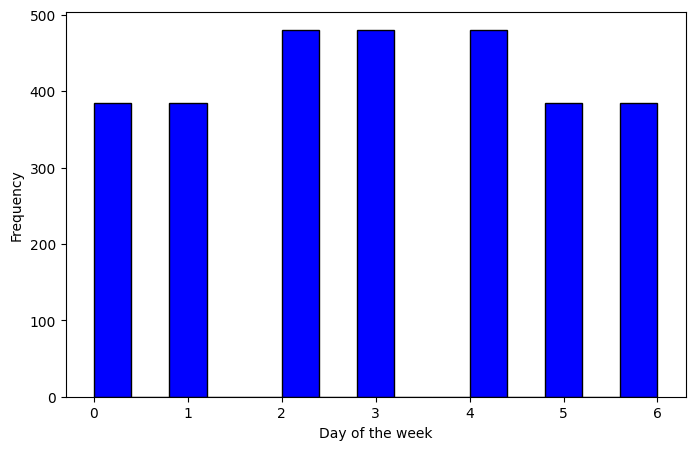

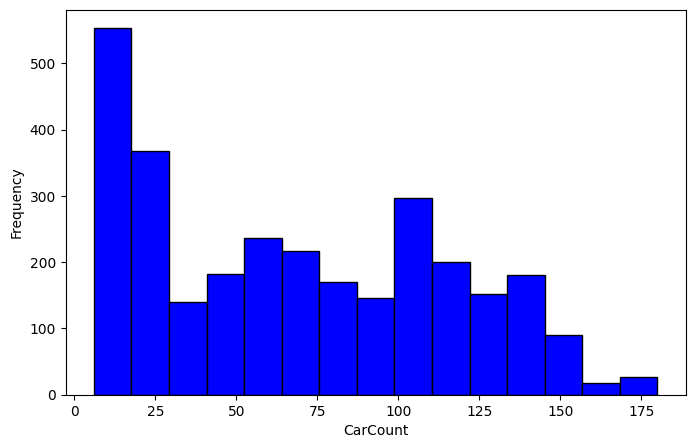

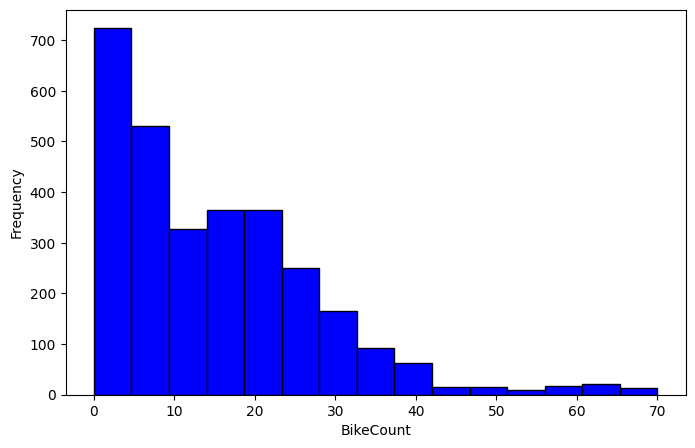

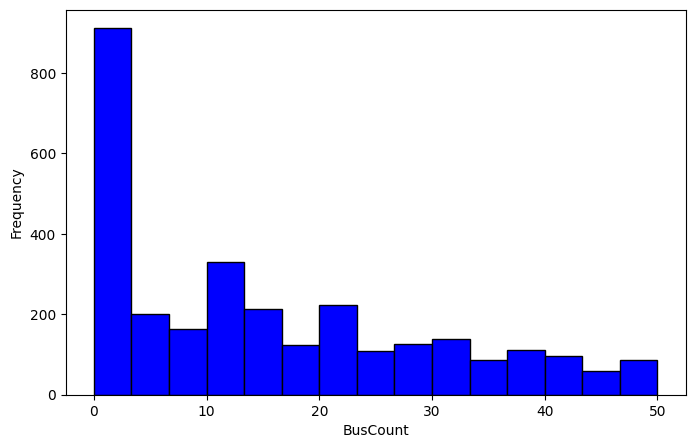

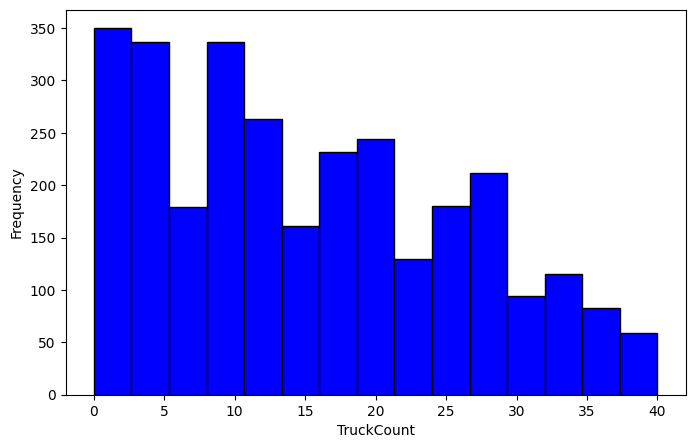

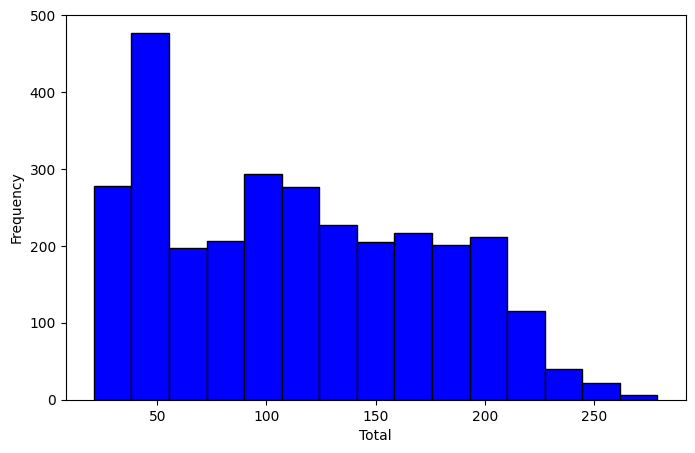

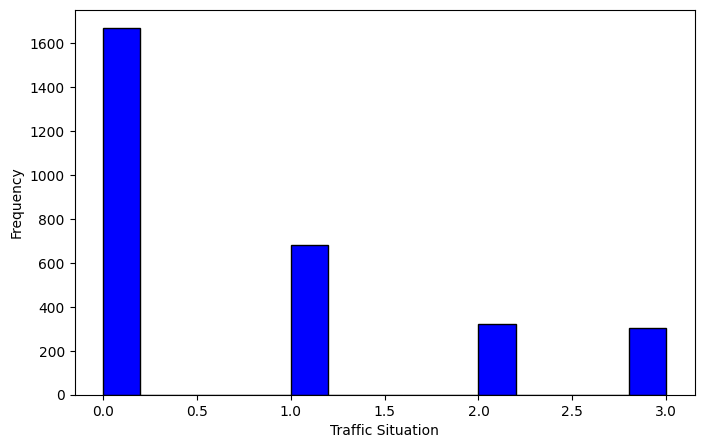

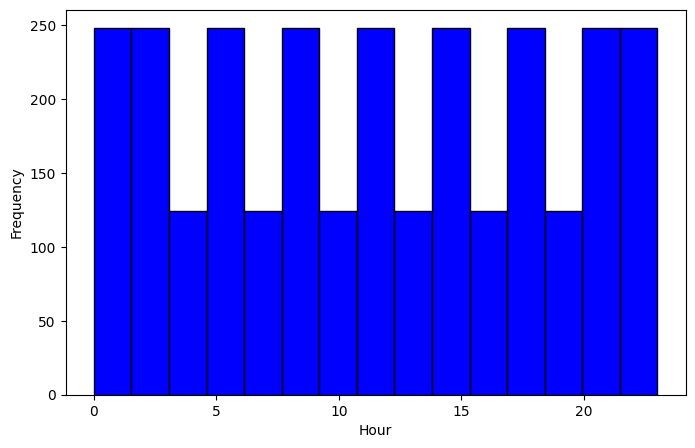

In [ ]:
for col in df.columns:
    plt.figure(figsize=(8,5))
    # Create a new figure for each column, size 8x5 inches

    plt.hist(
        df[col].dropna(),  # Use column data, excluding missing values (NaN)
        bins=15,           # Divide the data into 15 bins
        color='blue',      # Set the fill color of the bars
        edgecolor='black'  # Color of the bar edges
    )

    plt.xlabel(col)       # Label x-axis with the column name
    plt.ylabel("Frequency")  # Label y-axis
    plt.show()

**Histogram**

Benefit 1: It shows you how the values ​​within a column are distributed: are they clustered within a certain range, evenly distributed, or contain outliers?

Benefit 2: It allows you to quickly identify outliers or rare values ​​that differ from the rest of the data.

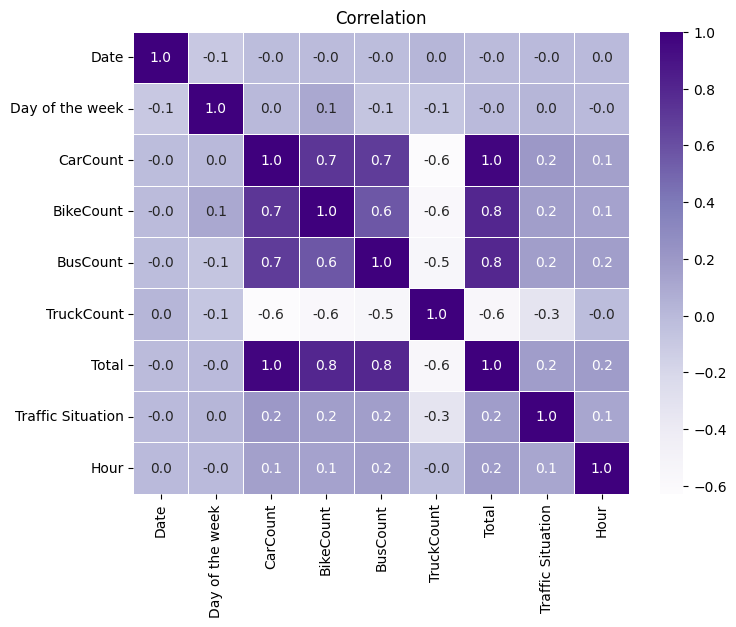

In [ ]:
corr = df.corr()
# Calculate the correlation matrix for all numerical columns in the DataFrame.
# Each value shows how strongly two variables are linearly related (-1 to 1).

plt.figure(figsize=(8, 6))
# Set the figure size to 8x6 inches.

sns.heatmap(
    corr,             # Input correlation matrix
    annot=True,       # Show the correlation values on the heatmap
    cmap='Purples',   # Color map for the heatmap (shades of purple)
    linewidths=0.5,   # Width of lines dividing cells
    fmt=".1f"         # Format numbers with 2 decimal places
)

plt.title("Correlation")
plt.show()